# Predicting House Prices
In this notebook, we'll build a linear regression pipeline that will perform preprocessing and feature engineering and selection to predict house prices from the Ames Housing data

In [4]:
### Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

### read the dataset into a pandas dataframe
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')

In [9]:
### show the first 5 rows of the dataframe
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [89]:
### show the general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

The data contains info on 2930 sales of houses in Ames with 82 features

### Simple Linear Regression

In [3]:
from sklearn.metrics import mean_squared_error as mse
def transform_features(train):
    return train
def select_features(train):
    return train[['Gr Liv Area','SalePrice']]

### create a function that split the data in train and test sets then selects the
### numerric features of the data to train using linear regression. The function
### returns the rmse score of the linear regression model
def train_and_test(train):
    train = train.iloc[:1460]
    test = train.iloc[1460:]
    numeric_train = train.select_dtypes(include = ['integer','float'])
    numeric_test = train.select_dtypes(include = ['integer','float'])
    ### createa a linear regression model with default options
    lr = LinearRegression()
    lr.fit(numeric_train.drop('SalePrice',axis=1), numeric_train['SalePrice'])
    predictions = lr.predict(numeric_test.drop('SalePrice',axis=1))
    rmse = np.sqrt(mse(numeric_test['SalePrice'], predictions))
    return rmse

### execute the functions
dfs = transform_features(df)
train = select_features(dfs)
rmse = train_and_test(train)

rmse

56034.362001412796

### Featurre Engineering

#### Handling missing numeric values

In [5]:
### print out the numeric columns with missing values
df_null = df.select_dtypes(include = ['integer', 'float']).isnull().sum()
df_null[df_null > 0]


Lot Frontage      490
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64

Since the dataset contains info on 2930 sales, we can drop any features with more than 150 missing values which is aprroximately 5%.

In [107]:
### drop the columns with more than 5% missing values
df = df[df_null[df_null < len(df) / 20].index]

###  print out the remainning columns with missing values
df_less_than_5pct = df.isnull().sum()
df_less_than_5pct[df_less_than_5pct>0]

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [114]:
### One of the imputing techniques for missing values is fill in the missing values 
### with their respective mode. Let's do that here:
df_fill_na = df.fillna(df.mode().iloc[0])

### print out the mdoe of the columns with missing values
print(df[df_less_than_5pct[df_less_than_5pct>0].index].mode().iloc[0])
print('---'*40)
### checking that all the missing values are filled
print(df_fill_na.isnull().sum())

Mas Vnr Area      0.0
BsmtFin SF 1      0.0
BsmtFin SF 2      0.0
Bsmt Unf SF       0.0
Total Bsmt SF     0.0
Bsmt Full Bath    0.0
Bsmt Half Bath    0.0
Garage Cars       2.0
Garage Area       0.0
Name: 0, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Order              0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen

Some of the features in the data does not provide useful information such as Year sold and Year built because they are not directly correlated with the price of the house. However, their difference shows how old a house is and thus, providing much better information for our LinearRegression model. Let's transform these features.

In [115]:
### some feature does not make sense
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [ ]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

In [ ]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

Some features are not useful for machine learning as they provides direct information about the final sale. Thus, we should drop them

In [ ]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

### Handling missing values with categorical features
For now let's just drop feature with missing values

In [6]:
### get the categorical with missing values and drop them
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
df.drop(drop_missing_cols_2.index, axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000


let's update our function

In [7]:

def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mses = mse(test["SalePrice"], predictions)
    rmse = np.sqrt(mses)
    
    return rmse


### Execute the functions
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.36731241307

### Feature Selection

#### Numerical Features

In [8]:
### Group in features that are numerical
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,34,0,0,0,0,0,2010,189900,13,12


In [9]:
### calculat the correlation score between the target feature 'SalePrice'
### and the other features
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2         0.006127
Misc Val             0.019273
Yr Sold              0.030358
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice 

Let's arbitrarily drop features with less than 0.4 score. We can experiment with this threshold more.

In [10]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [11]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

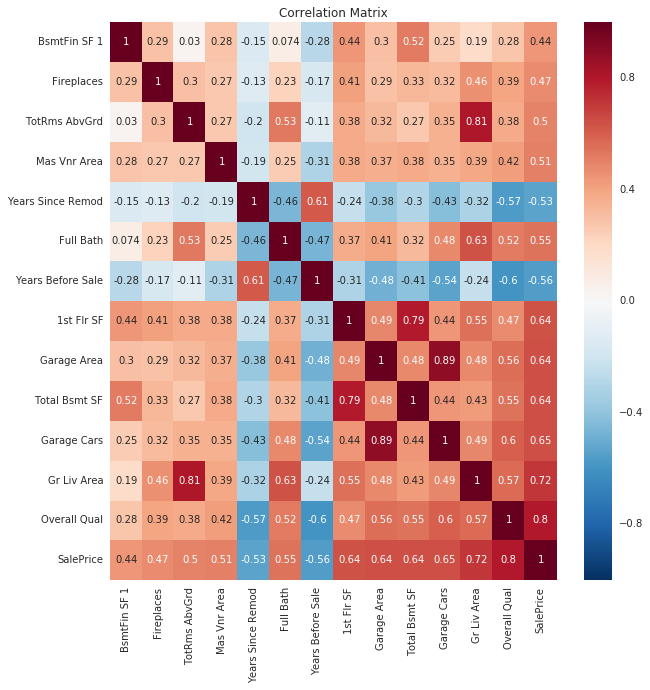

In [12]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df[abs_corr_coeffs[abs_corr_coeffs > 0.4].index].corr(), annot=True)
plt.title('Correlation Matrix')

Highly correlated features are:
- TotRms AbvGrd and GR Liv Area
- Garage Cars and Garage Area
- 1st Fl SF and Total Bsmt Sf
Let's keep Garage Area and GR Liv Area because they are continuous variables thus capturing more nuances. We can arbitrarily drop 1St Flr SF

In [14]:
transform_df = transform_df.drop(['TotRms AbvGrd', 'Garage Cars','1st Flr SF' ], axis=1)

#### Categorical Features

In [12]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

- Categorical features need to be hot encode before feeding to the model for training. But if a categorical feature contains too many unique values, hot encoding will generate as many columns for the data. We need to eliminate these features for ease of computation. Let's set a cut off point of 10 unique values.

In [67]:
## Which categorical columns have we still carried with us? We'll test these
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

In [68]:
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [69]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

In [66]:
list1 = []
for i in uniqueness_counts[uniqueness_counts < 10].index:
    for j in range(len(transform_df[i].value_counts())):
        if transform_df[i].value_counts()[j] <(len(transform_df)/20):
            list1.append(i)

print(list1)

['Street', 'Land Contour', 'Land Contour', 'Land Contour', 'Lot Config', 'Lot Config', 'Bldg Type', 'Bldg Type', 'Bldg Type', 'Roof Style', 'Roof Style', 'Roof Style', 'Roof Style', 'Foundation', 'Foundation', 'Foundation', 'Heating', 'Heating', 'Heating', 'Heating', 'Heating', 'MS Zoning', 'MS Zoning', 'MS Zoning', 'MS Zoning', 'MS Zoning', 'Condition 2', 'Condition 2', 'Condition 2', 'Condition 2', 'Condition 2', 'Condition 2', 'Condition 2', 'House Style', 'House Style', 'House Style', 'House Style', 'House Style', 'Roof Matl', 'Roof Matl', 'Roof Matl', 'Roof Matl', 'Roof Matl', 'Roof Matl', 'Roof Matl', 'Condition 1', 'Condition 1', 'Condition 1', 'Condition 1', 'Condition 1', 'Condition 1', 'Condition 1']


Update our select_feature function:

In [15]:

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    df = df.drop(['TotRms AbvGrd', 'Garage Cars','1st Flr SF' ], axis=1)
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

Now updating our train_and_test function to perform k-fold cross validation on the data

In [16]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [17]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

[26002.170814850968, 27683.60181690586, 24324.15525568986, 38725.326656952995]


29183.81363609992

### Conclusion
In this notebook, we built a machine learning pipeline that takes in a dataframe of housing data. For feature engineering the pipline drops any features with more than 5% missing values, fills in the remaining missing values with its mode. It also creates two new features that better represent the relationship between the target feature and the other features. The pipeline also drops features that would leak information about the  target feature. For feature selection, the pipeline only retains features that have a correlation score > 0.4 with the target feature while droping some features that are highly correlated with one another. The pipline also one hot encode categorical features while dropping categorical features with mroe than 10 unique values for ease of computation. Finally, the pipline train the data using k-fold cross validation. The results improve from about 56000 to 55000 